# **Leveraging Audiogram Frequencies to Predict Other Frequencies**


---

  The goal for this project was **to recreate** an audiogram, which consists of hearing thresholds from a listener in 7 different frequencies for each ear. In order to accomplish this task, recreating this audiogram leveraged 3 of these frequency values as inputs to Machine Learning models in order to predict the other threshold frequencies. Another important task for this project was to analyze the data provided.



In [119]:
# Download the Libraries

"""
Package Imports for Supervised Machine Learning and Deep Learning

Preprocessing:

- IterativeImputer: models a column with the missing values (target variable) as a function of other features (predictor variables) in a round-robin fashion. 

---

ADD: Link to documentation for IterativeImputer

---

Scikit-Learn Models:

- Linear Regression
- K Nearest Neighbors for Regression
- Decision Tree for Regression

Tensorflow Models:

- Artificial Neural Network: KerasRegressor

Model Training:

- Training / Testing Set: train_test_split
- Hyperparameter Tuning: Grid Search  with K-Fold Cross Validation 
"""

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

"""
Statistical Inference

- Probability Distributions
  - norm: Used for getting the normal distribution for a dataset
"""

from scipy.stats import norm


"""
Data Processing and Visualization Modules

Processing Modules:
- numpy 
- pandas

Visualization Modules:
- matplotlib
- seaborn
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Reading the Data**


---




Step 1: Reading the data.

Step 2: Seeing the types of variables to decide the next approaches 

In [ ]:
# Create the Data Frame - WRITE YOUR PATH
df = pd.read_csv("YOUR <PATH>")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,test_date,nid,L500k,L1k,L2k,L3k,L4k,L6k,L8k,R500k,...,R2k,R3k,R4k,R6k,R8k,gender,naics,age_group,region,NAICS_descr
0,08-FEB-2005,1,10,5,5,15,10,5,25,20,...,15,10,10,25,45,M,331512,4.0,MA,Steel Investment Foundries
1,17-MAR-2009,1,15,10,5,15,5,10,25,15,...,20,15,10,35,55,M,331512,5.0,MA,Steel Investment Foundries
2,08-FEB-2005,2,5,10,20,20,15,20,0,5,...,5,10,10,15,15,M,331512,2.0,MA,Steel Investment Foundries
3,29-FEB-2008,2,15,5,15,20,20,15,15,10,...,10,15,30,20,15,M,331512,3.0,MA,Steel Investment Foundries
4,08-FEB-2006,3,25,20,15,20,35,25,15,20,...,10,15,40,30,30,M,331512,3.0,MA,Steel Investment Foundries


In [ ]:
# Seeing the types of variables and how many variables are present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944670 entries, 0 to 2944669
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   test_date    object 
 1   nid          int64  
 2   L500k        object 
 3   L1k          object 
 4   L2k          object 
 5   L3k          object 
 6   L4k          object 
 7   L6k          object 
 8   L8k          object 
 9   R500k        object 
 10  R1k          object 
 11  R2k          object 
 12  R3k          object 
 13  R4k          object 
 14  R6k          object 
 15  R8k          object 
 16  gender       object 
 17  naics        int64  
 18  age_group    float64
 19  region       object 
 20  NAICS_descr  object 
dtypes: float64(1), int64(2), object(18)
memory usage: 471.8+ MB


## **Exploratory Data Analysis (EDA): Visualization**


---


For this part was to analyze and vizualize the peculiarities of our data.


1.   Which Column has the most missing values (NaN)?
2.   Correlation of the Features
3.   Normal distribution of the frequency features
4.   Gender Proportions
5. Which ear has the most hearing loss at various frequencies?





In [120]:
# Select a type of visualization 
plt.style.use('ggplot')

### Which Column Has The Most Missing Values (NaN)

Step 1: Replace the dirty values as NaN values
<br />
Step 2: Sum the NaN values in each column and plot it. 

In [121]:
# Replace invalid input as NaN values
df = df.replace('**', np.NaN)

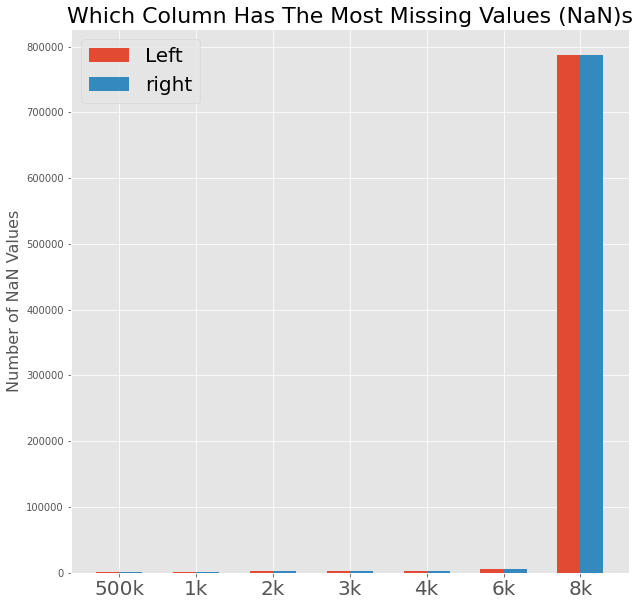

In [122]:
plt.figure(figsize=(10,10))

nan_values_left = [df['L500k'].isna().sum(), df['L1k'].isna().sum(), df['L2k'].isna().sum(),df['L3k'].isna().sum(), df['L4k'].isna().sum(), df['L6k'].isna().sum(), df['L8k'].isna().sum()]
nan_values_right = [df['R500k'].isna().sum(), df['R1k'].isna().sum(), df['R2k'].isna().sum(),df['R3k'].isna().sum(), df['R4k'].isna().sum(), df['R6k'].isna().sum(), df['R8k'].isna().sum()]
x = np.arange(7)

plt.bar(x , height = nan_values_left,width = 0.3, label='Left')
plt.bar(x + 0.3, height = nan_values_right,width = 0.3, label='right')

plt.xticks(x + 0.3 / 2, ('500k', '1k',	'2k',	'3k',	'4k',	'6k', '8k'), fontsize=20)

plt.title('Which Column Has The Most Missing Values (NaN)', fontsize=22)
plt.ylabel('Number of NaN Values', fontsize=16)

plt.legend(loc='best', fontsize=20)
plt.show()

In the first plot, I decided to vizualize the numbers of NaN Values each *major* features has.


---

As the graph show, the **R8k** and **L8K** represent the most all Nan value of our dataset. This will be determinant how I will handle the miss data.

### Vizualize the correlation of the features  


Step 1: tranform all my frequency features in numeric.
<br />
Step 2: Encode Gender as 1 or 2 instead of Male or Female or 0, if it is a missing value.
<br />
Step 3: Plot the Correlation Graph


In [123]:
"""
Data Processing Steps: 

Step 1: Treat the values as multiples of 5.
Step 2: Encode Gender as 1 or 2 instead of Male or Female or 0, if it is a missing value.
"""

all_cols = ['L500k', 'L1k','L2k','L3k','L4k','L6k','L8k','R500k', 'R1k','R2k','R3k','R4k','R6k','R8k']

df[all_cols] = df[all_cols].apply(pd.to_numeric)


for i in all_cols:
    df[i] = df[i] + (5 - df[i]%5)
df['gender'] = df['gender'].apply(lambda x :1 if x == 'F' else 2 if x == "M" else 0)


In [124]:
#Vizualize the correlation graph 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,nid,L500k,L1k,L2k,L3k,L4k,L6k,L8k,R500k,R1k,R2k,R3k,R4k,R6k,R8k,gender,naics,age_group
nid,1.000000,-0.027332,-0.025167,-0.014588,0.002970,0.004260,0.001608,0.107042,-0.014118,-0.022737,-0.014482,0.000742,0.002630,-0.000467,0.108258,-0.017363,0.025701,-0.003860
L500k,-0.027332,1.000000,0.737940,0.530673,0.365899,0.319431,0.326996,0.230760,0.713111,0.626533,0.488317,0.344489,0.302051,0.303587,0.211715,-0.016359,-0.040626,0.160756
L1k,-0.025167,0.737940,1.000000,0.693512,0.481970,0.423023,0.409102,0.291242,0.635315,0.765139,0.634198,0.453399,0.397674,0.384899,0.267989,0.032450,-0.031878,0.234031
L2k,-0.014588,0.530673,0.693512,1.000000,0.699846,0.590665,0.546310,0.382226,0.484072,0.618546,0.795976,0.653385,0.555114,0.511994,0.351191,0.072465,-0.031049,0.328662
L3k,0.002970,0.365899,0.481970,0.699846,1.000000,0.841565,0.709987,0.468610,0.343919,0.442512,0.617508,0.832910,0.775406,0.661850,0.431247,0.187135,-0.030385,0.435615
L4k,0.004260,0.319431,0.423023,0.590665,0.841565,1.000000,0.773842,0.498479,0.304978,0.393062,0.527788,0.754633,0.836240,0.719717,0.460245,0.219978,-0.031310,0.480702
L6k,0.001608,0.326996,0.409102,0.546310,0.709987,0.773842,1.000000,0.581654,0.309441,0.386415,0.500412,0.656520,0.722027,0.797114,0.518358,0.138364,-0.030927,0.460349
L8k,0.107042,0.230760,0.291242,0.382226,0.468610,0.498479,0.581654,1.000000,0.224759,0.275429,0.353348,0.440731,0.474076,0.530726,0.895035,0.074340,0.001263,0.379627
R500k,-0.014118,0.713111,0.635315,0.484072,0.343919,0.304978,0.309441,0.224759,1.000000,0.737291,0.547556,0.381226,0.328735,0.335889,0.241272,-0.022394,-0.040048,0.176692
R1k,-0.022737,0.626533,0.765139,0.618546,0.442512,0.393062,0.386415,0.275429,0.737291,1.000000,0.704307,0.488127,0.424237,0.410879,0.291958,0.011340,-0.032530,0.253263


Vizualize the Correlation of the Features.

---

The graph correlation shows that the features has **higher correlation** with **freuquency closer** to them. As frequency 1k has a higher correlation with 500k and 2k

### Normal distribution of the frequency features

Step 1: Create histogram and the normal distribution from each frequency feature

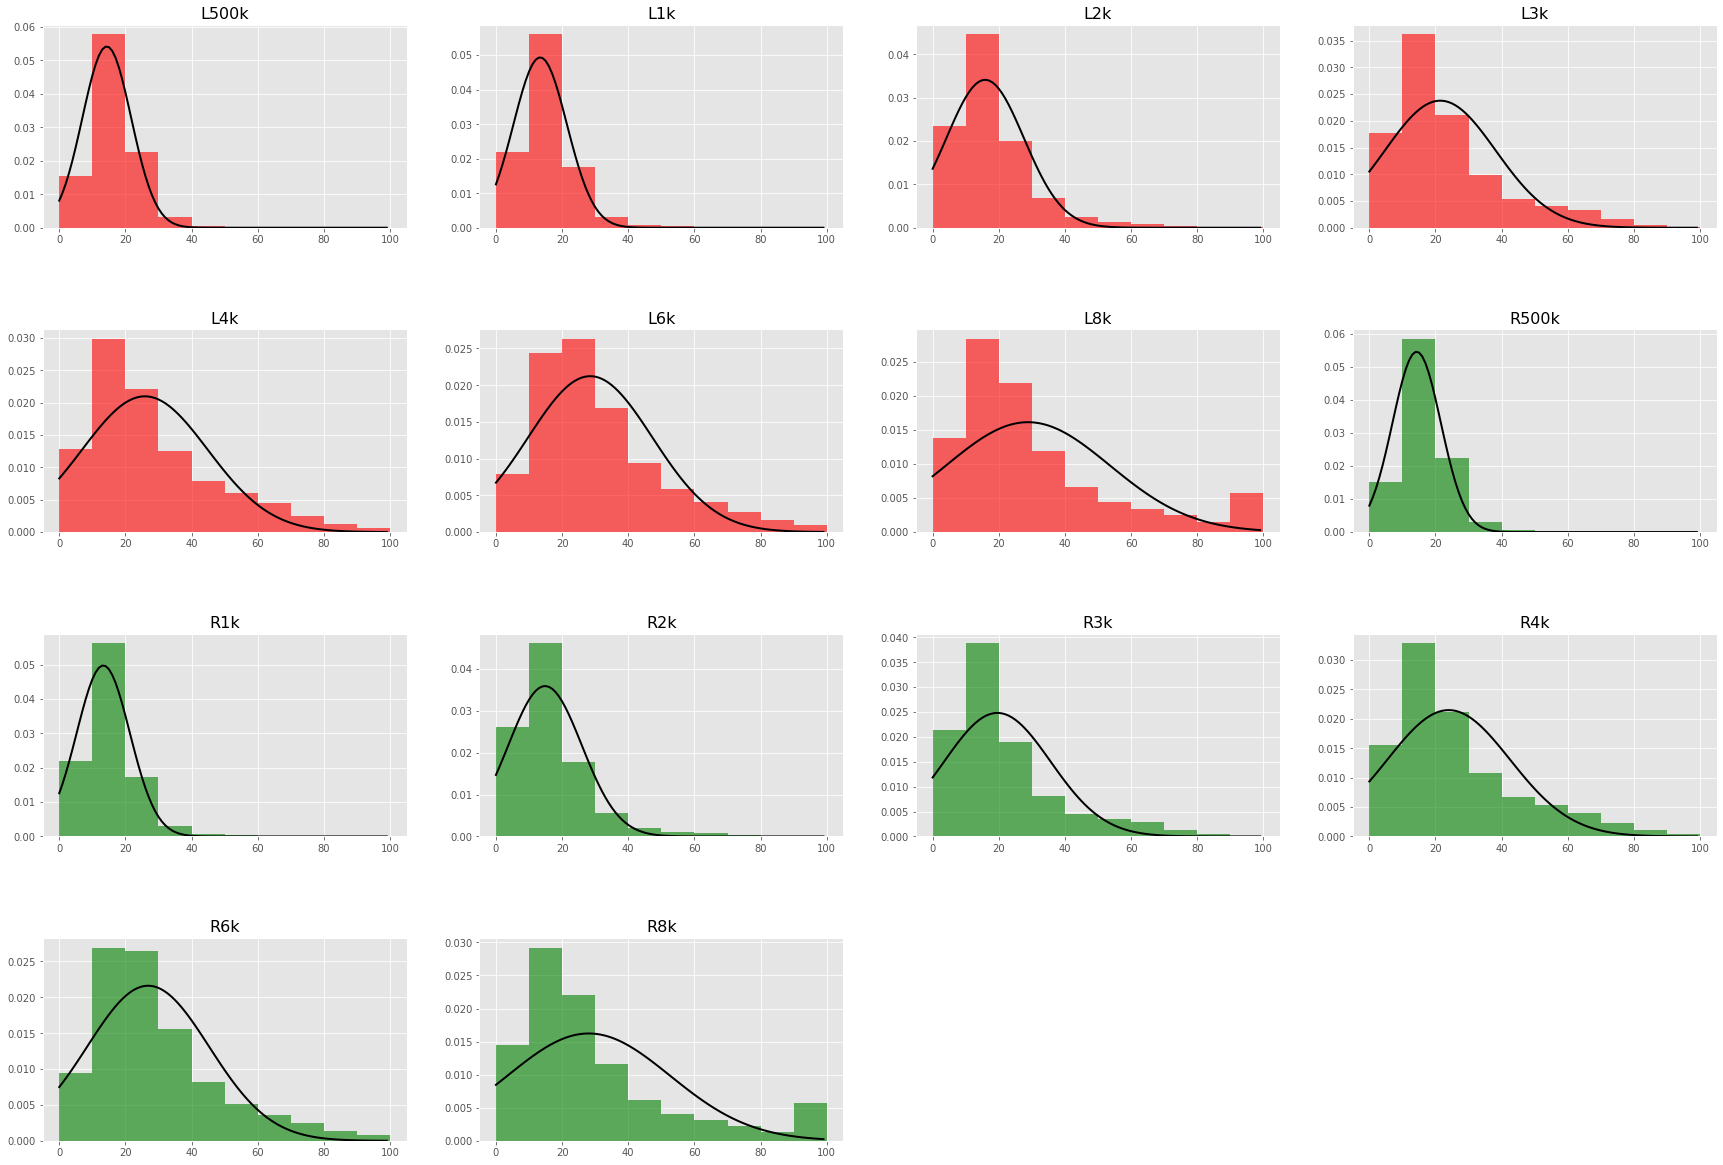

In [125]:
# Vizualize the distribution of the frequencies features

lis = ['L500k', 'L1k','L2k','L3k','L4k','L6k','L8k']
c = 1

# Create subplots with a histogram and the normal distribution in each feature
for data in lis:
  
    plt.subplot(4,4,c)

    #Create a probability distribution of a normal curve 
    size = np.arange(df[data].min(),df[data].max())
    p= norm.pdf(size, df[data].mean(), df[data].std())

    #Plot the Normal Distribution
    plt.plot(size, p, 'k', linewidth=2)


    # Plot the histogram.
    plt.hist(df[data], bins=10, density=True, alpha=0.6, color='red')
    plt.title(data ,fontsize = 16, color ='black')
    c+=1

lis_2 = ['R500k', 'R1k','R2k','R3k','R4k','R6k','R8k']

for data in lis_2:
  
    plt.subplot(4,4,c)
    #Create a normal distribuition 
    size = np.arange(df[data].min(),df[data].max())
    p = norm.pdf(size, df[data].mean(), df[data].std())

    #Plot the Normal Distribution
    plt.plot(size, p, 'k', linewidth=2)


    # Plot the histogram.
    plt.hist(df[data], bins=10, density=True, alpha=0.6, color='green')
    plt.title(data ,fontsize = 16, color ='black')
    c+=1

# Adjust the plot
plt.subplots_adjust(right = 4,top = 4, hspace = 0.5)

Show the normal distribution in the frequency featuares.


---

The graphs show that **lower frequencies** have **smaller standard deviations**; consequently, making it easier to predict those frequencies. 

### Gender Proportions

Step 1: Create a pie graph what shows the gender ratio  

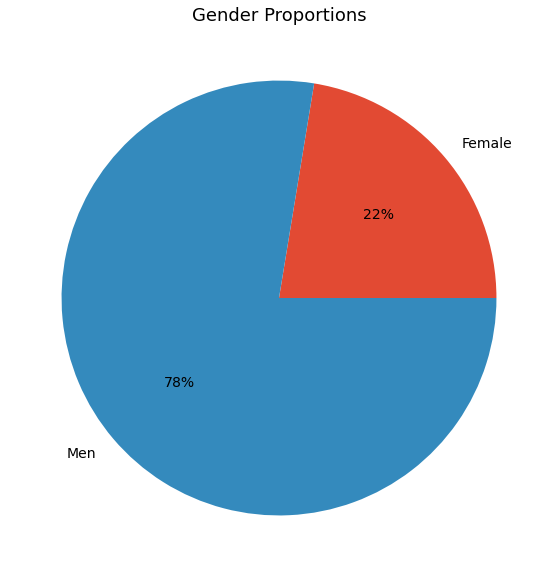

In [126]:
#Plot a pie graph and show the ratio of the gender distribution
plt.figure(figsize=(10,10))
x = np.arange(2)
y = [df.gender.value_counts()[1],df.gender.value_counts()[2]]
plt.pie(y, labels = ['Female', 'Men'], autopct='%1.0f%%',textprops={'fontsize': 14})
plt.title('Gender Proportions',fontsize = 18)
plt.show()

Visualize the gender has the most patients.


---


There are **more men** than women in this dataset with more than a **$\frac{3}{1}$ ratio** as the graph shows. 

### Which Ear Has The Most Hearing Loss at Various Frequencies

Step 1: Find the mean ($\mu$) value at each frequency.
<br />
Step 2: Plot a Bar Graph where compare the mean threshold between each ear and frequency level.

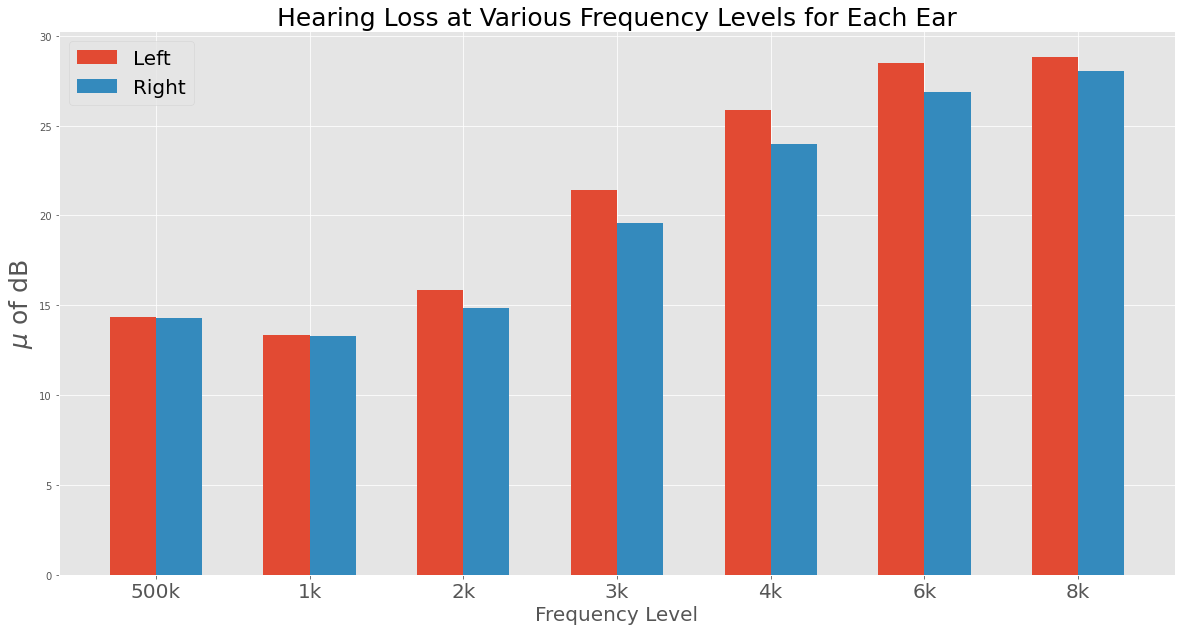

In [127]:
# Find the Mean value for each column
y_lf_values = [df['L500k'].mean(),df['L1k'].mean(),df['L2k'].mean(),df['L3k'].mean(),df['L4k'].mean(),df['L6k'].mean(),df['L8k'].mean()]

y_rg_values = [df['R500k'].mean(),df['R1k'].mean(),df['R2k'].mean(),df['R3k'].mean(),df['R4k'].mean(),df['R6k'].mean(),df['R8k'].mean()]

ind = np.arange(7)

#Plot the bar graph comparing their respective mean for each ear

plt.figure(figsize=(20,10))

plt.bar(x = ind, height = y_lf_values,width = 0.3, label='Left')
plt.bar(x = ind + 0.3, height = y_rg_values,width = 0.3, label='Right')

plt.xticks(ind + 0.3 / 2, ('500k', '1k',	'2k',	'3k',	'4k',	'6k', '8k'), fontsize=20)
plt.xlabel('Frequency Level', fontsize=20)
plt.ylabel(r'$\mu$ of dB', fontsize=25)
plt.title('Hearing Loss at Various Frequency Levels for Each Ear', fontsize=25)

plt.legend(loc='best', fontsize=20)
plt.show()

This part of vizualization is to see which ear has the most loss in dB at each frequency.


---

The **left** ear has the **worst** loss **across frequencies**.



## **Data Cleaning**



---

As mentioned before, most of the missing values came from the 8k frequency. Therefore, I decided to drop the rows that have missing values from the other columns. However, to handle the column 8k, I use a different approach in order to retain important records from the other frequency values. I decided to use the ``IterativeImpute()`` using the sklearn library.

Also for this part, I broke the data set for each ear. Training and testing set splits (80 Train, 20 Test) were conducted for both ears.

<br />

X: The 2K, 4K and 6k were selected as the features of the model. It was pre-determined. 
<br />
Y: The remaining 4 frequency levels are the targets to recreate the whole audiogram. 



In [ ]:
# Drop the rows that contains NaN values for the 500k, 1k, 2k, 3k, 4k, and 6k features
df = df.dropna(subset=['L500k', 'L1k','L2k','L3k','L4k','L6k','R500k', 'R1k','R2k','R3k','R4k','R6k'])

In [ ]:
# Loc all my features and targets
X = df.loc[:,['L500k', 'L1k','L2k','L3k','L4k','L6k','L8k','R500k', 'R1k','R2k','R3k','R4k','R6k','R8k']]

### 8K Frequency Feature Processing


---
 Step 1: Fit and tranform the data in the ``IterativeImpute()`` 

In [ ]:
impute_it = IterativeImputer()
X = impute_it.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### Creating the training and test data


---

Step 1: Split the data in Right/Left ear and features/targets.
<br />
Step 2: Split the dataset into Training and Test Sets.


---


For future approaches, maybe it is necessary to reduce bias from gender by the stratification of the gender variable while splitting the data in Training and Test due to the imbalance found in the ratio of men to women. 


In [ ]:
# Create Numpy arrays for X and y in each ear
X_left = np.zeros((X.shape[0],3))
y_left = np.zeros((X.shape[0],4))

X_right = np.zeros((X.shape[0],3))
y_right = np.zeros((X.shape[0],4))

In [ ]:
# Fill the X and y with the clean Data 
X_left[:,0] = X[:,2]
X_left[:,1] = X[:,4]
X_left[:,2] = X[:,5]

y_left[:,0] = X[:,0]
y_left[:,1] = X[:,1]
y_left[:,2] = X[:,3]
y_left[:,3] = X[:,6]

X_right[:,0] = X[:,9]
X_right[:,1] = X[:,11]
X_right[:,2] = X[:,12]

y_right[:,0] = X[:,7]
y_right[:,1] = X[:,8]
y_right[:,2] = X[:,10]
y_right[:,3] = X[:,13]



In [ ]:
# Seperate the data into test and train set for left ear (LF)
X_train_LF, X_test_LF, y_train_LF, y_test_LF = train_test_split(X_left, y_left, test_size = 0.2,random_state = 98)

In [ ]:
# Seperate the data into test and train set for right ear (RG)
X_train_RG, X_test_RG, y_train_RG, y_test_RG = train_test_split(X_right, y_right, test_size = 0.2,random_state = 98)

## **Trainig Models for LEFT Ear**


---


Using the Sckit_Learn and Keras libraries, I created 4 models:

- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Decision Tree Regressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)
- [KNeighbors Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
- [Artificial Neural Network](https://keras.io/api/layers/core_layers/dense/) 

To try both linear and non-linear regression, [multi-output models](https://machinelearningmastery.com/multi-output-regression-models-with-python/) to see which would give a better fit to predict the last 4 thresholds to complete the audiogram. The last three models were trained using the GridSearchCV to tune the hyperparameters.
<br />
Another important part of this step was to make the predictions in multiples of 5.

### **Linear Regression**


---

This model was the only one in which I did not use the Grid Search with K-Fold Cross Validation due to fact that the default values for `normalize = False` and `fit_intercepet = Caluculate_the_Intercept` were already satisfactory.
<br /> 
All the models features have the same scale.



In [ ]:
# Create the model and fitting
linear = LinearRegression()
linear.fit(X_train_LF,y_train_LF)

LinearRegression()

In [ ]:
# Calculate the Score and Predition. 
print(f' Score: {linear.score(X_test_LF,y_test_LF)}')
pred_1_LF = linear.predict(X_test_LF)

# Calculate the prediction in step of 5
pred_1_LF = pred_1_LF + [5-pred_1_LF%5]

 Score 0.48796152245322166


### **Decision Tree Regressor**



---



**Hyperparameters:** 

Tuned

1.   `max_depth` has to be a integer between 1 to 100. It determines the minimum number of samples each branch must have after spllting a node in a Decision Tree Regressor Model.
2.   `min_samples_split`: Controls the minimum number of samples requires to split an internal node.

Untuned

- `criterion`:  As criterion of split in a node, I schore the `squared_error` as the criterion.

**3-Fold Cross Validation:** To decrease the chances of overfitting the model, I used 3 different splits of the dataset as input and output to calculate the overall performance of the model.

**Grid_Search_Scoring:** The idea is to choose a combination of hyperparameters from all possible combinations that would result in the lowest `neg_mean_absolute_error` in order for the Decision Tree to generalize across new samples.



In [ ]:
# Create the model
tree = DecisionTreeRegressor(criterion = 'squared_error')

In [ ]:
# Choose the Hyperparametrs and create the GridSearchCV "model"
param_grid_5 = {"max_depth":[1,5,10,15,20],'min_samples_split':[2,5,10,15,20]}
tree= GridSearchCV(tree,param_grid_5, cv =3,scoring = 'neg_mean_absolute_error',n_jobs= -1)

In [ ]:
#Fit the model
tree.fit(X_train_LF,y_train_LF)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_absolute_error')

In [ ]:
### See the best Score and the hyperparameters in the model and get the model
print(f'Best n_neighbors:{tree.best_params_}')
print(f'Score:{tree.best_score_}')
tree = tree.best_estimator_
print(tree)

Best n_neighbors:{'max_depth': 15, 'min_samples_split': 20}
Score:-6.084055923035511
DecisionTreeRegressor(max_depth=15, min_samples_split=20)


In [ ]:
# Calculate the prediction in step of 5
pred_2_LF = tree.predict(X_test_LF)
pred_2_LF = pred_2_LF + [5-pred_2_LF%5]

###**KNeighbors Regressor**


---
**Hyperparameters:** 

1.   `n_neighbors`: The number of samples to determine the value of the target. This hyperparameter can be determinant for the model accuracy and overffiting. 

**3-Fold Cross Validation:** To decrease the chances of overfitting the model, I used 3 different splits of the dataset as input and output to calculate the overall performance of the model.

**Grid_Search_Scoring:** The idea is to choose a combination of hyperparameters from all possible combinations that would result in the lowest `neg_mean_absolute_error` in order for the Decision Tree to generalize across new samples.


In [ ]:
# Create the model
kneigh = KNeighborsRegressor()

In [ ]:
# Choose the Hyperparametrs and create the GridSearchCV "model"
param_grid_3 = {'n_neighbors': np.arange(1,10)}
kneigh = GridSearchCV(kneigh,param_grid_3, scoring = 'neg_mean_absolute_error', cv =3,n_jobs= -1)


In [ ]:
#Fit the model
kneigh.fit(X_train_LF,y_train_LF)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_absolute_error')

In [ ]:
### See the best Score and the hyperparameters in the model and get the model
print(f'Best n_neighbors:{kneigh.best_params_}')
print(f'Score:{kneigh.best_score_}')
kneigh = kneigh.best_estimator_
print(kneigh)

Best n_neighbors:{'n_neighbors': 9}
Score:-6.582249654588954
KNeighborsRegressor(n_neighbors=9)


In [ ]:
# Calculate the prediction in step of 5
pred_3_LF = kneigh.predict(X_test_LF)
pred_3_LF = pred_3_LF + [5-pred_3_LF%5]


### **Artificial Neural Network**


---


1.   Number of layers: it was random selection
2. Loss Functions Used to Evaluate: it is always a trick what the best loss function for the model. MSE (Mean Square Error) has lower variation results and high penalizartion for large error. While MAE (Mean Absolute Error) penalize equal the larger error and small error.  
3.   Optimizer: pick the most common optimizer for regressor model where combine the AdaGrad and RMSProp algorithm optimization.
4. Activation Functions: also it was pick for the most common activation function. Where it is a non-linear function, for valors negative it will have 0 outrupt and valors bigger than 0 will be a linear output.

**3-Fold Cross Validation:** To decrease the chances of overfitting the model, I used 3 different splits of the dataset as input and output to calculate the overall performance of the model.

**Grid_Search_Scoring:** The idea is to choose a combination of hyperparameters from all possible combinations that would result in the lowest `neg_mean_absolute_error` in order for the Decision Tree to generalize across new samples.

In [ ]:
def create_model(loss,layer_1,layer_2,layer_3,layer_4):

    #Create Model
    model = Sequential()
    model.add(Dense(layer_1, input_dim=3, kernel_initializer='he_uniform', activation='relu')) 
    model.add(Dense(layer_2, activation='relu'))
    model.add(Dense(layer_3, activation='relu'))
    model.add(Dense(layer_4, activation='relu'))
    model.add(Dense(4))

    #Compile the model
    model.compile(loss=loss, optimizer='adam')


    return model



In [ ]:
# create a KerasRegressor to easily turn the hyperparameter
model_lf = KerasRegressor(build_fn=create_model, nb_epoch =50, batch_size=256, validation_split = 0.2) #callbacks=[es_monitor]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
# Selecting the hyperparameter 
loss = ['mse', 'mae']
layer_1 = [30,40,50]
layer_2 = [20,25,30]
layer_3 = [10,15,20]
layer_4 = [5,8,10]
param_grid = dict(loss=loss,layer_1=layer_1,layer_2=layer_2, layer_3=layer_3,layer_4=layer_4)

# Condense the hyperparameter and the model  
grid = GridSearchCV(model_lf, param_grid, cv=3,scoring = 'neg_mean_absolute_error',n_jobs= -1,verbose =1)

#Fit the Model
grid_result = grid.fit(X_train_LF, y_train_LF)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
7340/7340 [==============================] - 14s 2ms/step - loss: 6.1629 - val_loss: 6.0013


In [ ]:
### See the best Score and the hyperparameters in the model and get the model
print(f'Best n_neighbors:{grid_result.best_params_}')
print(f'Score:{grid_result.best_score_}')
model_lf = grid_result.best_estimator_
print(model_lf)

Best n_neighbors:{'loss': 'mae', 'layer_4': 8, 'layer_3': 15, 'layer_2': 30, 'layer_1': 30}
Score:-6.045722543017793


In [ ]:
# Calculate the prediction in step of 5
y_pred_LF = model_lf.predict(X_test_LF)
pred_4_LF = y_pred_LF + [5-y_pred_LF%5]

## **Training Model for RIGHT Ear**

---

Using the Sckit_Learn and Keras libraries, I created 4 models:

- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Decision Tree Regressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)
- [KNeighbors Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
- [Artificial Neural Network](https://keras.io/api/layers/core_layers/dense/) 

To try both linear and non-linear regression, [multi-output models](https://machinelearningmastery.com/multi-output-regression-models-with-python/) to see which would give a better fit to predict the last 4 thresholds to complete the audiogram. The last three models were trained using the GridSearchCV to tune the hyperparameters.
<br />
Another important part of this step was to make the predictions in multiples of 5.

### **Linear Regression**
---

This model was the only one in which I did not use the Grid Search with K-Fold Cross Validation due to fact that the default values for `normalize = False` and `fit_intercepet = Caluculate_the_Intercept` were already satisfactory.
<br /> 
All the models features have the same scale.


In [ ]:
linear = LinearRegression()
linear.fit(X_train_RG,y_train_RG)

LinearRegression()

In [ ]:
print(f' Score {linear.score(X_test_RG,y_test_RG)}')
pred_1_RG = linear.predict(X_test_RG)
pred_1_RG = pred_1_RG + [5-pred_1_RG%5]

 Score 0.48893339294288407


### **Decision Tree Regressor**
---



**Hyperparameters:** 

Tuned

1.   `max_depth` has to be a integer between 1 to 100. It determines the minimum number of samples each branch must have after spllting a node in a Decision Tree Regressor Model.
2.   `min_samples_split`: Controls the minimum number of samples requires to split an internal node.

Untuned

- `criterion`:  As criterion of split in a node, I schore the `squared_error` as the criterion.

**3-Fold Cross Validation:** To decrease the chances of overfitting the model, I used 3 different splits of the dataset as input and output to calculate the overall performance of the model.

**Grid_Search_Scoring:** The idea is to choose a combination of hyperparameters from all possible combinations that would result in the lowest `neg_mean_absolute_error` in order for the Decision Tree to generalize across new samples.

In [ ]:
tree = DecisionTreeRegressor(criterion = 'squared_error')

In [ ]:
param_grid = {"max_depth":[1,5,10,15,20],'min_samples_split':[2,5,10,15,20]}
tree= GridSearchCV(tree,param_grid, cv =3,scoring = 'neg_mean_absolute_error',n_jobs= -1)

In [ ]:
tree.fit(X_train_RG,y_train_RG)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_absolute_error')

In [ ]:
### See the best Score and the hyperparameters in the model and get the model
print(f'Best n_neighbors:{tree.best_params_}')
print(f'Score:{tree.best_score_}')
tree = tree.best_estimator_
print(tree)

Best n_neighbors:{'max_depth': 15, 'min_samples_split': 20}
Score:-6.003894332092609
DecisionTreeRegressor(max_depth=15, min_samples_split=20)


In [ ]:
pred_2_RG = tree.predict(X_test_RG)
pred_2_RG = pred_2_RG + [5-pred_2_RG%5]

### **KNeighbors Regressor**
---
**Hyperparameters:** 

1.   `n_neighbors`: The number of samples to determine the value of the target. This hyperparameter can be determinant for the model accuracy and overffiting. 

**3-Fold Cross Validation:** To decrease the chances of overfitting the model, I used 3 different splits of the dataset as input and output to calculate the overall performance of the model.

**Grid_Search_Scoring:** The idea is to choose a combination of hyperparameters from all possible combinations that would result in the lowest `neg_mean_absolute_error` in order for the Decision Tree to generalize across new samples.


In [ ]:
kneigh = KNeighborsRegressor()

In [ ]:
param_grid = {'n_neighbors': np.arange(1,10)}
kneigh = GridSearchCV(kneigh,param_grid, scoring = 'neg_mean_absolute_error', cv =3,n_jobs= -1)


In [ ]:
kneigh.fit(X_train_RG,y_train_RG)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_absolute_error')

In [ ]:
### See the best Score and the hyperparameters in the model and get the model
print(f'Best n_neighbors:{kneigh.best_params_}')
print(f'Score:{kneigh.best_score_}')
kneigh = kneigh.best_estimator_
print(kneigh)

Best n_neighbors:{'n_neighbors': 9}
Score:-6.463523853647028
KNeighborsRegressor(n_neighbors=9)


In [ ]:
pred_3_RG = kneigh.predict(X_test_RG)
pred_3_RG = pred_3_RG + [5-pred_3_RG%5]

### **Neural Network**
---


1.   Number of layers: it was random selection
2. Loss Functions Used to Evaluate: it is always a trick what the best loss function for the model. MSE (Mean Square Error) has lower variation results and high penalizartion for large error. While MAE (Mean Absolute Error) penalize equal the larger error and small error.  
3.   Optimizer: pick the most common optimizer for regressor model where combine the AdaGrad and RMSProp algorithm optimization.
4. Activation Functions: also it was pick for the most common activation function. Where it is a non-linear function, for valors negative it will have 0 outrupt and valors bigger than 0 will be a linear output.

**3-Fold Cross Validation:** To decrease the chances of overfitting the model, I used 3 different splits of the dataset as input and output to calculate the overall performance of the model.

**Grid_Search_Scoring:** The idea is to choose a combination of hyperparameters from all possible combinations that would result in the lowest `neg_mean_absolute_error` in order for the Decision Tree to generalize across new samples.

In [ ]:
def create_model(loss,layer_1,layer_2,layer_3,layer_4):

    #Create Model
    model = Sequential()
    model.add(Dense(layer_1, input_dim=3, kernel_initializer='he_uniform', activation='relu')) 
    model.add(Dense(layer_2, activation='relu'))
    model.add(Dense(layer_3, activation='relu'))
    model.add(Dense(layer_4, activation='relu'))
    model.add(Dense(4))
    model.compile(loss=loss, optimizer='adam')


    return model



In [ ]:
# create model
model = KerasRegressor(build_fn=create_model, nb_epoch =100, batch_size=256, validation_split = 0.2) #callbacks=[es_monitor]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
loss = ['mse', 'mae']
layer_1 = [30,40,500]
layer_2 = [20,25,30]
layer_3 = [10,15,20]
layer_4 = [5,8,10]
#param_grid = {'loss':['mse', 'mae', 'hinge'], 'layer_1':[20,30,40], 'layer_2':[10,15,20],'layer_3':[5,8,10]}
param_grid = dict(loss=loss,layer_1=layer_1,layer_2=layer_2, layer_3=layer_3, layer_4=layer_4)
grid = GridSearchCV(model, param_grid, cv=3,scoring = 'neg_mean_absolute_error',n_jobs= -1)
grid = grid.fit(X_train_RG, y_train_RG)

7340/7340 [==============================] - 22s 3ms/step - loss: 6.0698 - val_loss: 5.9178


In [ ]:
print(f'Best n_neighbors:{grid_result.best_params_}')
print(f'Score:{grid_result.best_score_}')
model_RG = grid_result.best_estimator_
print(model_RG)

Best n_neighbors:{'loss': 'mae', 'layer_4': 8, 'layer_3': 15, 'layer_2': 30, 'layer_1': 30}
Score:-6.045722543017793


In [ ]:
pred_4_RG = model_RG.predict(X_test_RG)
pred_4_RG = pred_4_RG + [5-pred_4_RG%5]
pred_4_RG

array([[[15., 10., 10., 15.],
        [15., 15., 15., 25.],
        [10., 10., 35., 60.],
        ...,
        [20., 15., 20., 15.],
        [15., 15., 40., 45.],
        [15., 15., 10., 25.]]], dtype=float32)

## **Model Performance Visualization**


---


The last approach was to vizualized what model has better accuracy using the mean absolute error (MAE) at each frequency. 

Step 1: Reshape the predictions values
<br />
Step 2: Create a Data Frame for each model with the true value, predict value and MAE between the points. 
<br />
Step 3: Find the mean MAE for each model and frequency.
<br />
Step 4: Plot a line comparing the MAE between models  


###**Left Ear DataFrames**

In [128]:
# Reshape the predition values
pred_1_LF = pred_1_LF.reshape(y_test_LF.shape[0],4)
pred_2_LF = pred_2_LF.reshape(y_test_LF.shape[0],4)
pred_3_LF = pred_3_LF.reshape(y_test_LF.shape[0],4)
pred_4_LF = pred_4_LF.reshape(y_test_LF.shape[0],4)

In [129]:
# Create a Data Frame for NN model with true_value, predict_value and MAE between them for each frequency 
NN_L = pd.DataFrame()

NN_L['L500K_TRU'] = y_test_LF[:,0]
NN_L['L500K_PRED'] = pred_4_LF[:,0]
NN_L['L500K_MAE'] = abs(NN_L['L500K_TRU'] - NN_L['L500K_PRED'])

NN_L['L1K_TRU'] = y_test_LF[:,1]
NN_L['L1K_PRED'] = pred_4_LF[:,1]
NN_L['L1K_MAE'] = abs(NN_L['L1K_TRU'] - NN_L['L1K_PRED'])

NN_L['L3K_TRU'] = y_test_LF[:,2]
NN_L['L3K_PRED'] = pred_4_LF[:,2]
NN_L['L3K_MAE'] = abs(NN_L['L3K_TRU'] - NN_L['L3K_PRED'])

NN_L['L8K_TRU'] = y_test_LF[:,3]
NN_L['L8K_PRED'] = pred_4_LF[:,3]
NN_L['L8K_MAE'] = abs(NN_L['L8K_TRU'] - NN_L['L8K_PRED'])

In [130]:
# Create a Data Frame for KNN model with true_value, predict_value and MAE between them for each frequency
KN_L = pd.DataFrame()

KN_L['L500K_TRU'] = y_test_LF[:,1]
KN_L['L500K_PRED'] = pred_3_LF[:,0]
KN_L['L500K_MAE'] = abs(KN_L['L500K_TRU'] - KN_L['L500K_PRED'])

KN_L['L1K_TRU'] = y_test_LF[:,1]
KN_L['L1K_PRED'] = pred_3_LF[:,1]
KN_L['L1K_MAE'] = abs(KN_L['L1K_TRU'] - KN_L['L1K_PRED'])

KN_L['L3K_TRU'] = y_test_LF[:,2]
KN_L['L3K_PRED'] = pred_3_LF[:,2]
KN_L['L3K_MAE'] = abs(KN_L['L3K_TRU'] - KN_L['L3K_PRED'])

KN_L['L8K_TRU'] = y_test_LF[:,3]
KN_L['L8K_PRED'] = pred_3_LF[:,3]
KN_L['L8K_MAE'] = abs(KN_L['L8K_TRU'] - KN_L['L8K_PRED'])

In [131]:
# Create a Data Frame for Tree model with true_value, predict_value and MAE between them for each frequency
TREE_L = pd.DataFrame()

TREE_L['L500K_TRU'] = y_test_LF[:,0]
TREE_L['L500K_PRED'] = pred_2_LF[:,0]
TREE_L['L500K_MAE'] = abs(TREE_L['L500K_TRU'] - TREE_L['L500K_PRED'])

TREE_L['L1K_TRU'] = y_test_LF[:,1]
TREE_L['L1K_PRED'] = pred_2_LF[:,1]
TREE_L['L1K_MAE'] = abs(TREE_L['L1K_TRU'] - TREE_L['L1K_PRED'])

TREE_L['L3K_TRU'] = y_test_LF[:,2]
TREE_L['L3K_PRED'] = pred_2_LF[:,2]
TREE_L['L3K_MAE'] = abs(TREE_L['L3K_TRU'] - TREE_L['L3K_PRED'])

TREE_L['L8K_TRU'] = y_test_LF[:,3]
TREE_L['L8K_PRED'] = pred_2_LF[:,3]
TREE_L['L8K_MAE'] = abs(TREE_L['L8K_TRU'] - TREE_L['L8K_PRED'])

In [132]:
# Create a Data Frame for Linear model with true_value, predict_value and MAE between them for each frequency
LINEAR_L = pd.DataFrame()

LINEAR_L['L500K_TRU'] = y_test_LF[:,0]
LINEAR_L['L500K_PRED'] = pred_1_LF[:,0]
LINEAR_L['L500K_MAE'] = abs(LINEAR_L['L500K_TRU'] - LINEAR_L['L500K_PRED'])

LINEAR_L['L1K_TRU'] = y_test_LF[:,1]
LINEAR_L['L1K_PRED'] = pred_1_LF[:,1]
LINEAR_L['L1K_MAE'] = abs(LINEAR_L['L1K_TRU'] - LINEAR_L['L1K_PRED'])

LINEAR_L['L3K_TRU'] = y_test_LF[:,2]
LINEAR_L['L3K_PRED'] = pred_1_LF[:,2]
LINEAR_L['L3K_MAE'] = abs(LINEAR_L['L3K_TRU'] - LINEAR_L['L3K_PRED'])

LINEAR_L['L8K_TRU'] = y_test_LF[:,3]
LINEAR_L['L8K_PRED'] = pred_1_LF[:,3]
LINEAR_L['L8K_MAE'] = abs(LINEAR_L['L8K_TRU'] - LINEAR_L['L8K_PRED'])

###**Right Ear DataFrames**

In [133]:
# Reshape the predition values
pred_1_RG = pred_1_RG.reshape(y_test_LF.shape[0],4)
pred_2_RG = pred_2_RG.reshape(y_test_LF.shape[0],4)
pred_3_RG = pred_3_RG.reshape(y_test_LF.shape[0],4)
pred_4_RG = pred_4_RG.reshape(y_test_LF.shape[0],4)

In [134]:
# Create a Data Frame for NN model with true_value, predict_value and MAE between them for each frequency
NN_R = pd.DataFrame()

NN_R['R500K_TRU'] = y_test_RG[:,0]
NN_R['R500K_PRED'] = pred_4_RG[:,0]
NN_R['R500K_MAE'] = abs(NN_R['R500K_TRU'] - NN_R['R500K_PRED'])

NN_R['R1K_TRU'] = y_test_RG[:,1]
NN_R['R1K_PRED'] = pred_4_RG[:,1]
NN_R['R1K_MAE'] = abs(NN_R['R1K_TRU'] - NN_R['R1K_PRED'])

NN_R['R3K_TRU'] = y_test_RG[:,2]
NN_R['R3K_PRED'] = pred_4_RG[:,2]
NN_R['R3K_MAE'] = abs(NN_R['R3K_TRU'] - NN_R['R3K_PRED'])

NN_R['R8K_TRU'] = y_test_RG[:,3]
NN_R['R8K_PRED'] = pred_4_RG[:,3]
NN_R['R8K_MAE'] = abs(NN_R['R8K_TRU'] - NN_R['R8K_PRED'])

In [135]:
# Create a Data Frame for KNN model with true_value, predict_value and MAE between them for each frequency
KN_R = pd.DataFrame()

KN_R['R500K_TRU'] = y_test_RG[:,0]
KN_R['R500K_PRED'] = pred_3_RG[:,0]
KN_R['R500K_MAE'] = abs(KN_R['R500K_TRU'] - KN_R['R500K_PRED'])

KN_R['R1K_TRU'] = y_test_RG[:,1]
KN_R['R1K_PRED'] = pred_3_RG[:,1]
KN_R['R1K_MAE'] = abs(KN_R['R1K_TRU'] - KN_R['R1K_PRED'])

KN_R['R3K_TRU'] = y_test_RG[:,2]
KN_R['R3K_PRED'] = pred_3_RG[:,2]
KN_R['R3K_MAE'] = abs(KN_R['R3K_TRU'] - KN_R['R3K_PRED'])

KN_R['R8K_TRU'] = y_test_RG[:,3]
KN_R['R8K_PRED'] = pred_3_RG[:,3]
KN_R['R8K_MAE'] = abs(KN_R['R8K_TRU'] - KN_R['R8K_PRED'])

In [136]:
# Create a Data Frame for Tree model with true_value, predict_value and MAE between them for each frequency
TREE_R = pd.DataFrame()

TREE_R['R500K_TRU'] = y_test_RG[:,0]
TREE_R['R500K_PRED'] = pred_2_RG[:,0]
TREE_R['R500K_MAE'] = abs(TREE_R['R500K_TRU'] - TREE_R['R500K_PRED'])

TREE_R['R1K_TRU'] = y_test_RG[:,1]
TREE_R['R1K_PRED'] = pred_2_RG[:,1]
TREE_R['R1K_MAE'] = abs(TREE_R['R1K_TRU'] - TREE_R['R1K_PRED'])

TREE_R['R3K_TRU'] = y_test_RG[:,2]
TREE_R['R3K_PRED'] = pred_2_RG[:,2]
TREE_R['R3K_MAE'] = abs(TREE_R['R3K_TRU'] - TREE_R['R3K_PRED'])

TREE_R['R8K_TRU'] = y_test_RG[:,3]
TREE_R['R8K_PRED'] = pred_2_RG[:,3]
TREE_R['R8K_MAE'] = abs(TREE_R['R8K_TRU'] - TREE_R['R8K_PRED'])

In [137]:
# Create a Data Frame for Linear model with true_value, predict_value and MAE between them for each frequency
LINEAR_R = pd.DataFrame()

LINEAR_R['R500K_TRU'] = y_test_RG[:,0]
LINEAR_R['R500K_PRED'] = pred_1_RG[:,0]
LINEAR_R['R500K_MAE'] = abs(LINEAR_R['R500K_TRU'] - LINEAR_R['R500K_PRED'])

LINEAR_R['R1K_TRU'] = y_test_RG[:,1]
LINEAR_R['R1K_PRED'] = pred_1_RG[:,1]
LINEAR_R['R1K_MAE'] = abs(LINEAR_R['R1K_TRU'] - LINEAR_R['R1K_PRED'])

LINEAR_R['R3K_TRU'] = y_test_RG[:,2]
LINEAR_R['R3K_PRED'] = pred_1_RG[:,2]
LINEAR_R['R3K_MAE'] = abs(LINEAR_R['R3K_TRU'] - LINEAR_R['R3K_PRED'])

LINEAR_R['R8K_TRU'] = y_test_RG[:,3]
LINEAR_R['R8K_PRED'] = pred_1_RG[:,3]
LINEAR_R['R8K_MAE'] = abs(LINEAR_R['R8K_TRU'] - LINEAR_R['R8K_PRED'])

###**Plotting**

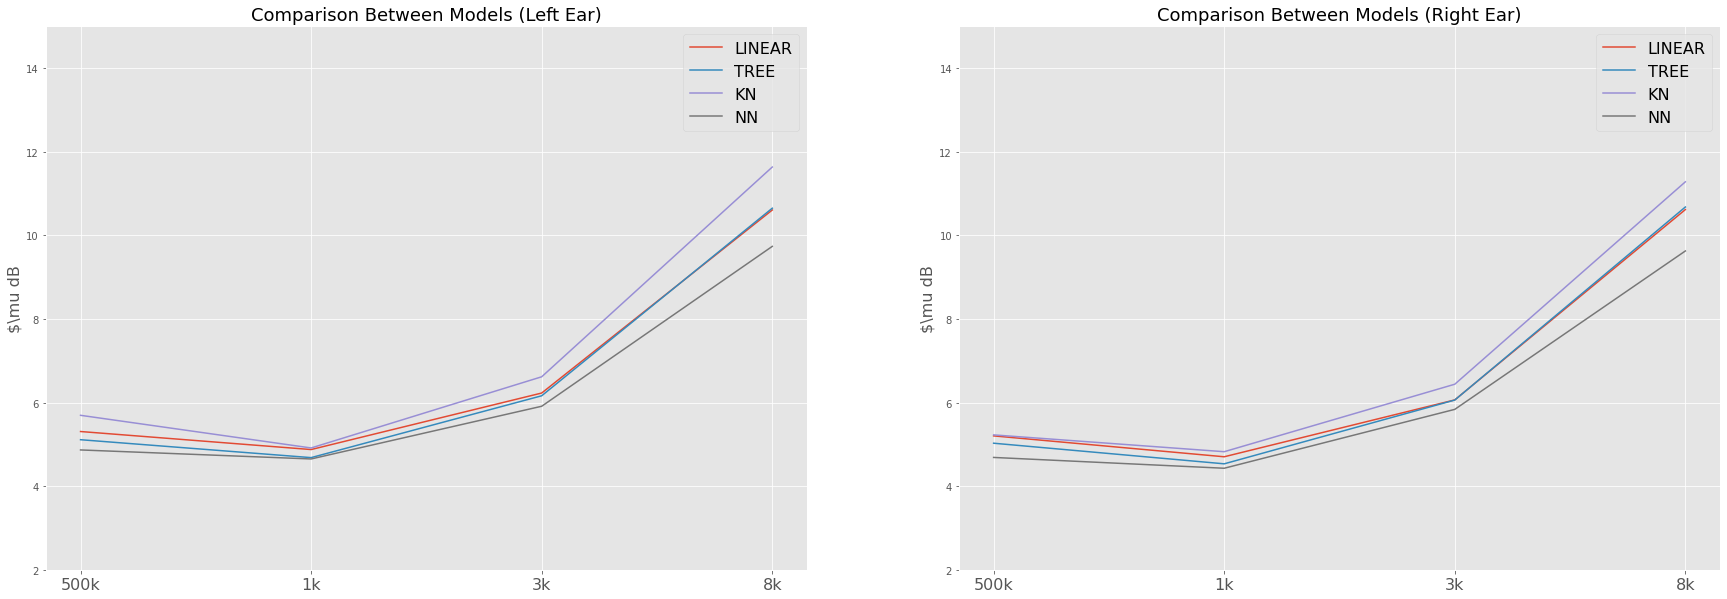

In [143]:

plt.figure(figsize=(30,10))

# Plotting the Left Ear Results
plt.subplot(1,2,1)

x = np.arange(4)

# Find the mean ABE for each model in each frequency

y_1 = [LINEAR_L['L500K_MAE'].mean(), LINEAR_L['L1K_MAE'].mean(), LINEAR_L['L3K_MAE'].mean(), LINEAR_L['L8K_MAE'].mean()]
y_2 = [TREE_L['L500K_MAE'].mean(), TREE_L['L1K_MAE'].mean(), TREE_L['L3K_MAE'].mean(), TREE_L['L8K_MAE'].mean()]
y_3 = [KN_L['L500K_MAE'].mean(), KN_L['L1K_MAE'].mean(), KN_L['L3K_MAE'].mean(), KN_L['L8K_MAE'].mean()]
y_4 = [NN_L['L500K_MAE'].mean(), NN_L['L1K_MAE'].mean(), NN_L['L3K_MAE'].mean(), NN_L['L8K_MAE'].mean()]

plt.plot(x,y_1, label = "LINEAR")
plt.plot(x, y_2, label = "TREE")
plt.plot(x, y_3, label = "KN")
plt.plot(x, y_4, label = "NN")

plt.xticks(x, ('500k', '1k',	'3k', '8k'), fontsize=16)
plt.ylabel(r'$\mu dB', fontsize=16)
plt.title('Comparison Between Models (Left Ear)', fontsize=18)

plt.ylim([2,15])
plt.legend(fontsize=16)


# PLotting the Right Ear Results
plt.subplot(1,2,2)

x = np.arange(4)

# Find the mean ABE for each model in each frequency
y_1 = [LINEAR_R['R500K_MAE'].mean(), LINEAR_R['R1K_MAE'].mean(), LINEAR_R['R3K_MAE'].mean(), LINEAR_R['R8K_MAE'].mean()]
y_2 = [TREE_R['R500K_MAE'].mean(), TREE_R['R1K_MAE'].mean(), TREE_R['R3K_MAE'].mean(), TREE_R['R8K_MAE'].mean()]
y_3 = [KN_R['R500K_MAE'].mean(), KN_R['R1K_MAE'].mean(), KN_R['R3K_MAE'].mean(), KN_R['R8K_MAE'].mean()]
y_4 = [NN_R['R500K_MAE'].mean(), NN_R['R1K_MAE'].mean(), NN_R['R3K_MAE'].mean(), NN_R['R8K_MAE'].mean()]

plt.plot(x,y_1, label = "LINEAR")
plt.plot(x, y_2, label = "TREE")
plt.plot(x, y_3, label = "KN")
plt.plot(x, y_4, label = "NN")

plt.xticks(x, ('500k', '1k',	'3k', '8k'), fontsize=16)
plt.ylabel(r'$\mu dB', fontsize=16)
plt.title('Comparison Between Models (Right Ear)', fontsize=18)

plt.ylim([2,15])
plt.legend(fontsize=16)
plt.show()

Interpretation:

--- 

1.   The NN method had the lowest mean absolute error across all frequencies for the left ear.
2.   The NN method had the lowest mean absolute error across all frequencies for the right ear.

**BOTH NEURAL NETWORK MODELS WERE SELECTED AS THE BEST MODELS FOR FUTURE PREDICTIONS**

In [139]:
# Save the best model (NN) for LEFT ear for future approaches
model_lf.model.save('Models/NN_LF.h5') 

In [140]:
# Save the best model (NN) for RIGHT ear for future approaches
model_RG.model.save('Models/NN_RG.h5') 